<a href="https://colab.research.google.com/github/jayesh20011996/abc/blob/main/regression_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)


In [3]:
cars = pd.read_csv('https://raw.githubusercontent.com/akjadon/Data/master/python/autos.csv')

In [4]:
cars

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,privat,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,1500
1,privat,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3600
2,privat,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,650
3,privat,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2200
4,privat,Angebot,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249171,privat,Angebot,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,3200
249172,privat,Angebot,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,1150
249173,privat,Angebot,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,1199
249174,privat,Angebot,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,9200


In [5]:
cars.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [7]:
from sklearn import preprocessing

In [9]:
col_object = [x for x in cars.columns if cars[x].dtype=="object"]
col_object

['seller',
 'offerType',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [10]:
col_others = [x for x in cars.columns if cars[x].dtype != "object"]
col_others

['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'price']

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
cars_encoded_object = cars[col_object].apply(le.fit_transform)

In [13]:
cars_encoded_object 

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
0,1,0,4,1,118,1,37,1
1,1,0,4,1,103,3,31,1
2,1,0,6,1,11,1,2,0
3,1,0,2,1,8,1,25,1
4,1,0,6,1,40,1,37,1
...,...,...,...,...,...,...,...,...
249171,1,0,6,1,142,1,30,0
249172,1,0,1,1,249,1,24,1
249173,1,0,2,0,108,1,32,1
249174,1,0,1,1,224,3,37,1


In [14]:
cars_encoded = pd.concat([cars_encoded_object, cars[col_others]], axis=1)

In [16]:
cars_encoded.head()

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price
0,1,0,4,1,118,1,37,1,2001,75,150000,6,1500
1,1,0,4,1,103,3,31,1,2008,69,90000,7,3600
2,1,0,6,1,11,1,2,0,1995,102,150000,10,650
3,1,0,2,1,8,1,25,1,2004,109,150000,8,2200
4,1,0,6,1,40,1,37,1,1980,50,40000,7,0


Text(0, 0.5, 'price')

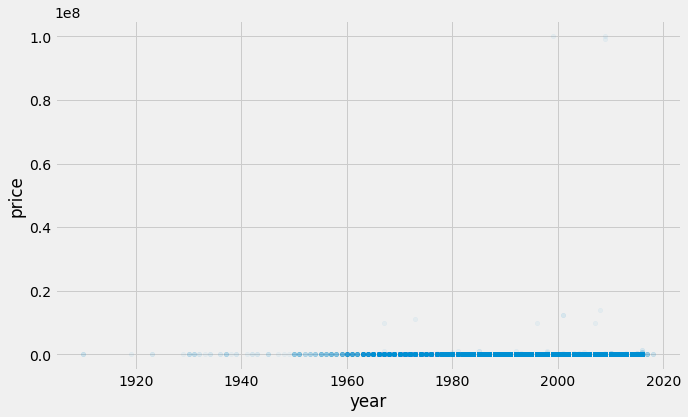

In [17]:
plt.scatter(cars_encoded.yearOfRegistration, cars_encoded.price, s=20, alpha=0.05)
plt.xlabel('year')
plt.ylabel('price')

In [18]:
cars_encoded['log10price'] = np.log10(cars_encoded.price+1)

In [19]:
cars_encoded

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price,log10price
0,1,0,4,1,118,1,37,1,2001,75,150000,6,1500,3.176381
1,1,0,4,1,103,3,31,1,2008,69,90000,7,3600,3.556423
2,1,0,6,1,11,1,2,0,1995,102,150000,10,650,2.813581
3,1,0,2,1,8,1,25,1,2004,109,150000,8,2200,3.342620
4,1,0,6,1,40,1,37,1,1980,50,40000,7,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249171,1,0,6,1,142,1,30,0,2004,225,150000,5,3200,3.505286
249172,1,0,1,1,249,1,24,1,2000,0,150000,3,1150,3.061075
249173,1,0,2,0,108,1,32,1,2000,101,125000,3,1199,3.079181
249174,1,0,1,1,224,3,37,1,1996,102,150000,3,9200,3.963835


Text(0, 0.5, 'log10price')

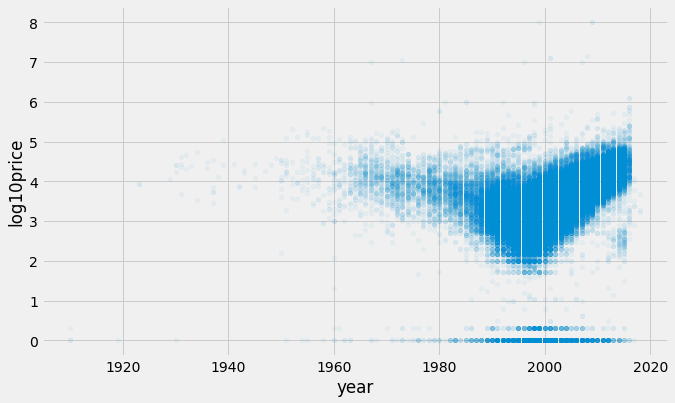

In [25]:
plt.scatter(cars_encoded.yearOfRegistration, cars_encoded.log10price, s=20, alpha=0.05)
plt.xlabel('year')
plt.ylabel('log10price')

Text(0, 0.5, 'log10price')

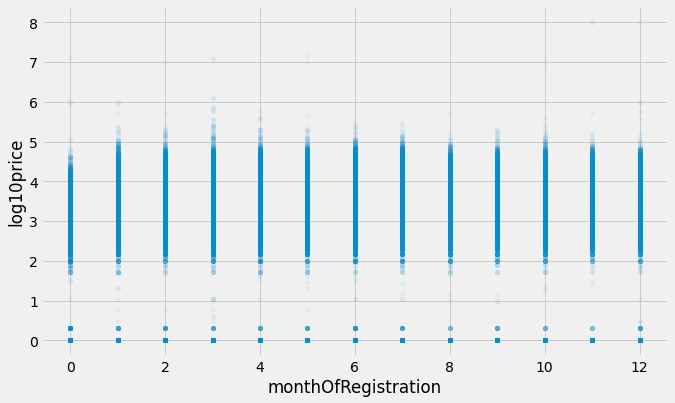

In [27]:
plt.scatter(cars_encoded.monthOfRegistration, cars_encoded.log10price, s=20, alpha=0.05)
plt.xlabel('monthOfRegistration')
plt.ylabel('log10price')


In [28]:
cars_encoded.head()

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price,log10price
0,1,0,4,1,118,1,37,1,2001,75,150000,6,1500,3.176381
1,1,0,4,1,103,3,31,1,2008,69,90000,7,3600,3.556423
2,1,0,6,1,11,1,2,0,1995,102,150000,10,650,2.813581
3,1,0,2,1,8,1,25,1,2004,109,150000,8,2200,3.342620
4,1,0,6,1,40,1,37,1,1980,50,40000,7,0,0.000000


In [29]:
y = cars_encoded.iloc[:, -1]

In [30]:
y

0         3.176381
1         3.556423
2         2.813581
3         3.342620
4         0.000000
            ...   
249171    3.505286
249172    3.061075
249173    3.079181
249174    3.963835
249175    4.462263
Name: log10price, Length: 249176, dtype: float64

In [31]:
x = cars_encoded.iloc[:, 0:12]

In [32]:
x

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,yearOfRegistration,powerPS,kilometer,monthOfRegistration
0,1,0,4,1,118,1,37,1,2001,75,150000,6
1,1,0,4,1,103,3,31,1,2008,69,90000,7
2,1,0,6,1,11,1,2,0,1995,102,150000,10
3,1,0,2,1,8,1,25,1,2004,109,150000,8
4,1,0,6,1,40,1,37,1,1980,50,40000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
249171,1,0,6,1,142,1,30,0,2004,225,150000,5
249172,1,0,1,1,249,1,24,1,2000,0,150000,3
249173,1,0,2,0,108,1,32,1,2000,101,125000,3
249174,1,0,1,1,224,3,37,1,1996,102,150000,3


In [33]:
from sklearn import linear_model

In [34]:
model_ols = linear_model.LinearRegression()

In [35]:
model_ols.fit(x, y)

LinearRegression()

In [37]:
model_ols.coef_

array([-3.44100506e-01, -2.48931559e+00, -1.45016778e-02, -2.15433457e-01,
       -1.72855546e-04,  7.75851320e-02, -2.21562066e-03,  4.63360547e-01,
        3.18689809e-02,  5.22540972e-04, -3.43232660e-06,  5.24214376e-03])

In [38]:
model_ols.intercept_

-59.91208103393828

In [39]:
y_ols = model_ols.predict(x)

In [41]:
y_ols

array([3.23457423, 3.83676041, 2.68211589, ..., 3.54361652, 3.25396411,
       4.14209919])

In [40]:
from sklearn import metrics

In [42]:
metrics.mean_squared_error(y_ols, y)

0.26061808366881345